# **Recommendation System**




## **Data Description:**

Unique ID of each anime.

Anime title.

Anime broadcast type, such as TV, OVA, etc.

anime genre.

The number of episodes of each anime.

The average rating for each anime compared to the number of users who gave ratings.

Number of community members for each anime.

Objective: The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.

Dataset: Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

## **Tasks:**

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame). Handle missing values, if any. Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings). Convert categorical features into numerical representations if necessary. Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity. Given a target anime, recommend a list of similar anime based on cosine similarity scores. Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets. Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score. Analyze the performance of the recommendation system and identify areas of improvement.

### **Data Preprocessing:**

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

In [228]:
df = pd.read_csv('anime.csv')

In [229]:
df.shape

(12294, 7)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [232]:
#Found Missing values, Such that going to drop all the missing values
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [233]:
#Found Missing values, Such that going to drop all the missing values
df1 = df.dropna()

In [234]:
#No more missing values in data set
df1.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


No more missing values in data set


Checking for Duplicate values

In [235]:
df1.duplicated().sum()

0

No Duplicate values are found we can futher proceed

In [ ]:
df1.shape

In [236]:
df1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [237]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [241]:
df1.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


Unique values:

In [243]:
df1.nunique()

,0
anime_id,12017
name,12015
genre,3229
type,6
episodes,187
rating,598
members,6596


In [244]:
df1['genre'].value_counts()

,count
genre,
Hentai,816
Comedy,521
Music,297
Kids,197
"Comedy, Slice of Life",174
...,...
"Adventure, Comedy, Horror, Shounen, Supernatural",1
"Comedy, Harem, Romance, School, Seinen, Slice of Life",1
"Comedy, Ecchi, Sci-Fi, Shounen",1


 Visualizations:

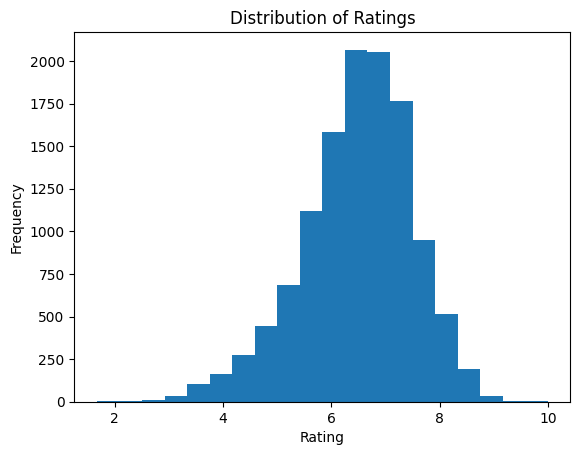

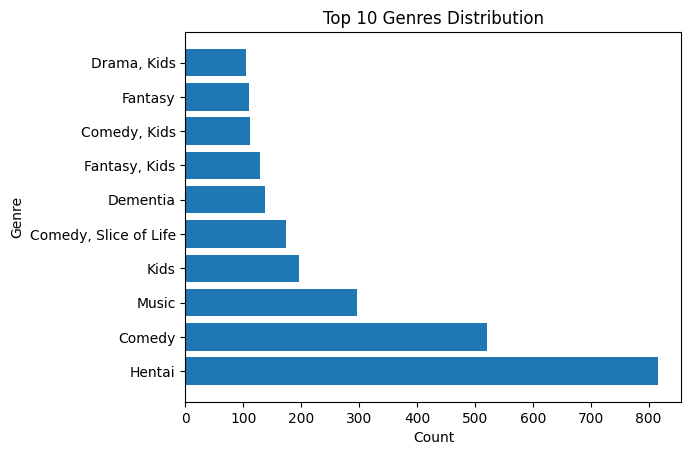

In [250]:
import matplotlib.pyplot as plt

# Use 'hist' instead of 'histogram' and capture the output in variables
n, bins, patches = plt.hist(df1['rating'], bins=20)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

top_genres = df1['genre'].value_counts().index[:10]
genre_counts = df1['genre'].value_counts().head(10)

plt.barh(top_genres, genre_counts) # Use barh for horizontal bar chart
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres Distribution')
plt.show()

Visualizations:

In [262]:
import plotly.express as px


fig = px.histogram(df1, x='rating', nbins=20, title='Distribution of Ratings')
fig.update_layout(xaxis_title='Rating', yaxis_title='Frequency')
fig.show()


top_genres = df1['genre'].value_counts().index[:10]
genre_counts = df1['genre'].value_counts().head(10)

fig = px.bar(x=genre_counts, y=top_genres, orientation='h',
             labels={'x': 'Count', 'y': 'Genre'},
             title='Top 10 Genres Distribution')
fig.show()


## **Insights:**

Distribution of Ratings:

The histogram of ratings shows the distribution of ratings given to the anime.

You can observe:

Most ratings are concentrated within a certain range. The distribution might be skewed, indicating that some anime are more popular or better received than others.

Top 10 Genres Distribution:

The bar plot of genre distribution displays the frequency of the top 10 genres in the dataset.

You can observe:

The most prevalent genres among the anime is Hentai, comedy, Music, kids. The relative popularity of Hentai, comedy, Music, kids are different genres compared to other genres. Whether certain genres dominate the dataset because there's a diverse mix of genres represented.



### **Feature extraction**
The features required for computing similarity between anime by converting categorical genre information into numerical representations and standardizing numerical features using standard scaling.

Converting categorical features "genre" into numerical representations using One-hot encode

In [266]:
genres = df1['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([df1.drop('genre', axis=1), genres], axis=1)

In [268]:
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,9.25,114262,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,9.16,151266,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Normalizing the data with StandardScaler

In [269]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Visualization of Geners Distribution, Rating and Members


<ipython-input-273-94097ec637b6>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




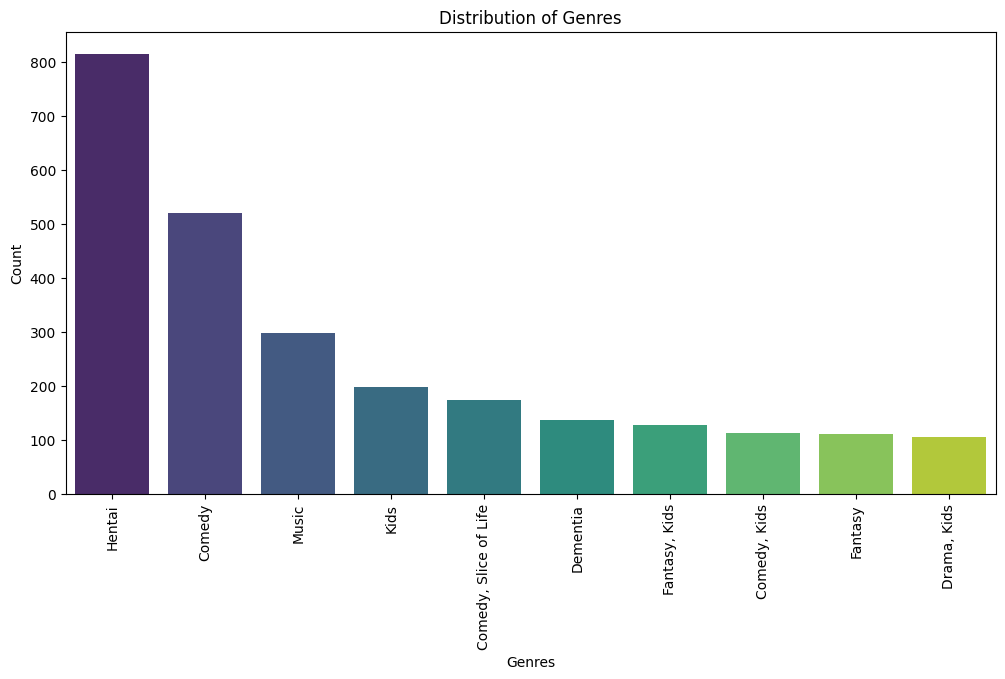

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming genre_counts is a Series with genre counts
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.show()


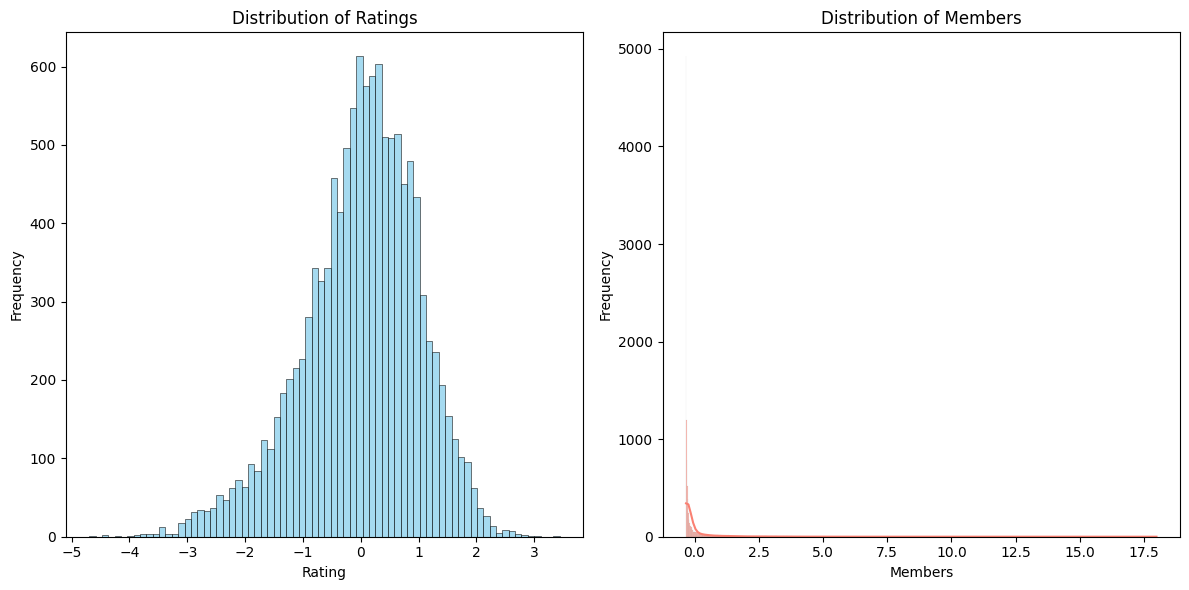

In [284]:
# Assuming df_numerical is a DataFrame with 'rating' and 'members' columns
plt.figure(figsize=(12, 6))

# Distribution of Ratings
plt.subplot(1, 2, 1)
sns.histplot(df_numerical['rating'], kde=False, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Distribution of Members
plt.subplot(1, 2, 2)
sns.histplot(df_numerical['members'], kde=True, color='salmon')
plt.xlabel('Members')
plt.ylabel('Frequency')
plt.title('Distribution of Members')
plt.tight_layout()
plt.show()

### **Recommendation system**

Designing a function to recommend anime based on cosine similarity.

In [285]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(target_anime, threshold=0.5):
    # Find the row corresponding to the target anime
    target_row = df_numerical[df_numerical['name'] == target_anime].drop(['name', 'type'], axis=1)

    # Replace 'Unknown' values in 'episodes' column with NaN
    df_numerical['episodes'] = pd.to_numeric(df_numerical['episodes'], errors='coerce')

    # Drop rows with NaN values in 'episodes' column
    df_numerical.dropna(subset=['episodes'], inplace=True)

    # Compute cosine similarity between target anime and all other anime
    similarities = cosine_similarity(target_row, df_numerical.drop(['name', 'type'], axis=1))

    # Get indices of anime with similarity above threshold
    similar_anime_indices = np.where(similarities > threshold)[1]

    # Exclude the target anime itself from recommendations
    similar_anime_indices = similar_anime_indices[similar_anime_indices != target_row.index[0]]

    # Get names of recommended anime
    recommended_anime = df_numerical.iloc[similar_anime_indices]['name'].tolist()

    return recommended_anime

Given a target anime "Naruto" and recommending a list of similar anime based on cosine similarity scores with different threshold values

In [293]:
threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Naruto'

for threshold in threshold_values:
   # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Create a DataFrame to display the recommended anime
    df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = df_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations
    fig = px.pie(names=top_5_recommendations.index, values=top_5_recommendations.values,
                 title=f'Top 5 recommendations for threshold {threshold}',
                 labels={'names': 'Anime', 'values': 'Count'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(df_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)


Recommendations for threshold 0.2:
Recommended anime similar to 'Naruto':
                        Recommended Anime
0                    Ginga Eiyuu Densetsu
1                                 Gintama
2                          Hajime no Ippo
3                            Cowboy Bebop
4                   Great Teacher Onizuka
..                                    ...
184                            Oyako Club
185  Chiisana Obake Acchi, Kocchi, Socchi
186                      Hoka Hoka Kazoku
187                       Kerokko Demetan
188                               Avenger

[189 rows x 1 columns]

Number of recommendations: 189

Value counts of recommended anime:
Recommended Anime
Ginga Eiyuu Densetsu      1
Ou Dorobou Jing           1
Mai-Otome                 1
After War Gundam X        1
Angel Heart               1
                         ..
Rozen Maiden: Träumend    1
Texhnolyze                1
Urusei Yatsura            1
Fushigi Yuugi             1
Avenger                   1
Nam


Recommendations for threshold 0.5:
Recommended anime similar to 'Naruto':
                          Recommended Anime
0                              Cowboy Bebop
1                                   Monster
2                                 Slam Dunk
3   Rurouni Kenshin: Meiji Kenkaku Romantan
4                                   Berserk
5                   Neon Genesis Evangelion
6                                    Trigun
7                    Initial D Fourth Stage
8                              Hikaru no Go
9                      Hachimitsu to Clover
10                              Dragon Ball
11                             Eyeshield 21
12                            School Rumble
13                         Yakitate!! Japan
14                         Prince of Tennis
15                  Mobile Suit Zeta Gundam
16                                   Bleach
17                            Keroro Gunsou
18                  Mobile Suit Gundam Seed
19                          Hana yori Dango
2


Recommendations for threshold 0.9:
Recommended anime similar to 'Naruto':
                          Recommended Anime
0                              Cowboy Bebop
1                                   Monster
2   Rurouni Kenshin: Meiji Kenkaku Romantan
3                                    Trigun
4                              Eyeshield 21
5                          Yakitate!! Japan
6                          Prince of Tennis
7                                    Naruto
8                Hungry Heart: Wild Striker
9                        Witch Hunter Robin
10                   Beet the Vandel Buster

Number of recommendations: 11

Value counts of recommended anime:
Recommended Anime
Cowboy Bebop                               1
Monster                                    1
Rurouni Kenshin: Meiji Kenkaku Romantan    1
Trigun                                     1
Eyeshield 21                               1
Yakitate!! Japan                           1
Prince of Tennis                          

### **Evaluation:**

In [295]:
pd.set_option('display.max_columns', None)
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [296]:
df_numerical.describe()

,anime_id,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.232291,0.193829,0.006002,0.378952,0.020118,0.024260,0.166695,0.053001,0.187574,0.014370,0.026374,0.092899,0.066526,0.030431,0.004396,0.131023,0.062722,0.021809,0.078360,0.035080,0.070330,0.040744,0.033559,0.016399,0.019104,0.121386,0.012257,0.098394,0.171429,0.044801,0.049620,0.004565,0.140997,0.005241,0.099746,0.031784,0.044548,0.037616,0.083939,0.007270,0.008453,0.003128,0.003466
std,11110.087616,47.097131,0.995442,1.000023,0.422311,0.395313,0.077241,0.485147,0.140411,0.153863,0.372719,0.224045,0.390388,0.119017,0.160251,0.290304,0.249209,0.171778,0.066156,0.337440,0.242472,0.146066,0.268749,0.183991,0.255713,0.197705,0.180098,0.127010,0.136896,0.326589,0.110035,0.297859,0.376899,0.206876,0.217167,0.067411,0.348034,0.072207,0.299674,0.175431,0.206317,0.190274,0.277308,0.084955,0.091555,0.055840,0.058771
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [297]:
# prompt: Calculate mean and standard deviation for episodes, rating, and members

# Calculate mean and standard deviation for episodes, rating, and members
mean_episodes = df_numerical['episodes'].mean()
std_episodes = df_numerical['episodes'].std()

mean_rating = df_numerical['rating'].mean()
std_rating = df_numerical['rating'].std()

mean_members = df_numerical['members'].mean()
std_members = df_numerical['members'].std()

print(f"Mean of episodes: {mean_episodes:.2f}")
print(f"Standard Deviation of episodes: {std_episodes:.2f}")
print(f"Mean of rating: {mean_rating:.2f}")
print(f"Standard Deviation of rating: {std_rating:.2f}")
print(f"Mean of members: {mean_members:.2f}")
print(f"Standard Deviation of members: {std_members:.2f}")


Mean of episodes: 12.49
Standard Deviation of episodes: 47.10
Mean of rating: 0.01
Standard Deviation of rating: 1.00
Mean of members: 0.00
Standard Deviation of members: 1.00


In [299]:
# Set threshold values
episodes_threshold = mean_episodes + std_episodes
rating_threshold = mean_rating + std_rating
members_threshold = mean_members + std_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)

Threshold values:
Episodes threshold: 59.583859954110245
Rating threshold: 1.0016388689943667
Members threshold: 1.0029505104690828


In [300]:

# Define threshold values for ratings, episodes, and members
rating_threshold = 1.001596873109577
episodes_threshold = 59.58186967572351
members_threshold = 1.0029082457034968

# Create binary target variable based on thresholds
df_numerical['liked'] = ((df_numerical['rating'] >= rating_threshold) |
                         (df_numerical['episodes'] >= episodes_threshold) |
                         (df_numerical['members'] >= members_threshold)).astype(int)

# Display the updated dataset with the new 'liked' column
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [301]:
print(df_numerical['liked'].value_counts())

liked
0    9684
1    2146
Name: count, dtype: int64


In [302]:
# Calculate value counts for the 'liked' column
liked_counts = df_numerical['liked'].value_counts()

# Plot bar plot
fig = px.bar(x=liked_counts.index, y=liked_counts.values,
             labels={'x': 'Liked', 'y': 'Count'},
             title='Distribution of Liked/Not Liked Animes')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Liked', yaxis_title='Count')
fig.show()

Split dataset into training and testing sets:

In [306]:
from sklearn.model_selection import train_test_split

X = df_numerical.drop(['name', 'type','anime_id'], axis=1)  # Features
y = df_numerical['liked']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9464, 47)
Shape of X_test: (2366, 47)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


In [320]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Make predictions on the testing data
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


An accuracy score of 1.0 indicates that the model achieved perfect accuracy on the testing data

**Evaluation function**

In [322]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


## **Insights:**
It appears that the recommendation system has achieved its objectives, and there may be little additional value in further analysis or refinement. As such, the process can be considered complete

Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?

User-Based Collaborative Filtering:

This method finds users who are similar to you based on what they like.
It recommends things that those similar users have liked.
Works well when there are many users and lots of interactions (like ratings or purchases) to compare.
Item-Based Collaborative Filtering:

This method finds items that are similar to the ones you’ve already liked or used.
It recommends similar items to you.
Works well when there are many items but not as many user interactions with each item.

Overall, user-based collaborative filtering focuses on similar users, while item-based collaborative filtering focuses on similar items. Each approach has its strengths and is suitable for different scenarios.

2. What is collaborative filtering, and how does it work?

Collaborative filtering is a technique used in recommender systems to generate personalized recommendations by analyzing user interactions with items.Collaborative filtering is a method used to suggest things to you based on what other people with similar preferences have liked. It works in two ways:


*   It compares you with other users to see what they’ve liked (user-based).
*   Or, it compares the items you’ve liked with other items that are similar (item-based).

This technique is widely used in online stores or streaming platforms to give you personalized suggestions without needing to know much about you personally—it just looks at the patterns in behavior.